## **Aplicación del Modelo ResNet50 para proyecto de Tamizaje automatizado de glaucoma con Inteligencia Artificial**



## ¿Qué es ResNet?

**ResNet = Residual Network**, desarrollada por Microsoft Research.

Objetivo: **Entrenar redes MUY profundas sin que colapsen.**

**ResNet50 → tiene 50 capas.**

Usa la técnica de bloques residuales: su función es permitir que algunas capas “se salten” otras a través de una conexión de atajo (skip connection).Esta estructura facilita el aprendizaje de la identidad y mejora la retropropagación.



---



---



🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥
# **WORKFLOW**
1. Exploración y carga de datasets
2. Preprocesamiento de imágenes
3. División del Dataset en train, validation and test
4. Preparación del modelo ResNet50
5. Entrenamiento del modelo
6. Evaluación de métricas
7. Ajuste del modelo para mejoras
8. Test Final con Datos nuevos
9. Guardar modelo Final


🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨






---



---



# **1. Exploración y carga de datasets**

## MONTAR DRIVE Y CONFIGURAR RUTAS 

Se espera encontrar las imágenes en la carpeta base, conteniendo las diferentes bases de datos de imágenes en una carpeta cada una: ORIGA, REFUGE y G1020.

Si los datos se encuentran en Google Drive / Google Colab (descomentar estas líneas):

In [ ]:
# from google.colab import drive
# import os

# # Montar Drive
# drive.mount('/content/drive')

# # Rutas base
# base_path = "/content/drive/MyDrive/GlaucomaProject/Datasets"

# model_path = "/content/"

Si los datos se encuentran en local (descomentar estas líneas):

In [16]:
import os
base_path = "./datos/"
model_path = "./"

In [17]:
# Definir rutas para los datasets
origa_path = os.path.join(base_path, "ORIGA")
refuge_path = os.path.join(base_path, "REFUGE")
g1020_path = os.path.join(base_path, "G1020")

## ESTRUCTURA UNIFICADA PARA DATAFRAME MAESTRO

Se construye un dataframe con estas columnas:

- `image_path`: ruta completa a la imagen

- `label`: **0 = No glaucoma**, **1 = Glaucoma**

- `source`: ORIGA / REFUGE / G1020


## ANÁLISIS POR DATASET

### **ORIGA**

- Usaremos: **Images** y el archivo **OrigaList.csv** o **origa_info.csv**

- Contiene etiquetas clínicas (glaucoma = 1, no = 0)


In [18]:
#inspección rápida de las columnas en OrigaList.csv
import pandas as pd

origaListCSV = os.path.join(origa_path, "OrigaList.csv")

# Cargar el archivo CSV de OrigaList
origa_df = pd.read_csv(origaListCSV)
print(origa_df.columns)

print("Número de registros en OrigaList.csv:", len(origa_df))

# Mostrar las primeras filas del DataFrame
print("📋 Muestra del DataFrame OrigaList.csv:")
print(origa_df.sample(10))  # También puedes usar .sample(5) para ver filas aleatorias


Index(['Eye', 'Filename', 'ExpCDR', 'Set', 'Glaucoma'], dtype='object')
Número de registros en OrigaList.csv: 650
📋 Muestra del DataFrame OrigaList.csv:
    Eye Filename  ExpCDR Set  Glaucoma
564  OS  565.jpg  0.4959   A         0
59   OD  060.jpg  0.4528   B         0
328  OS  329.jpg  0.5482   B         0
225  OD  226.jpg  0.4923   A         0
356  OD  357.jpg  0.5829   B         0
163  OS  164.jpg  0.5160   B         0
521  OD  522.jpg  0.5297   B         0
127  OD  128.jpg  0.5718   A         0
120  OD  121.jpg  0.6830   B         0
474  OD  475.jpg  0.4079   A         0


In [19]:
import os
import pandas as pd

# Cargar el archivo OrigaList.csv
origa_df = pd.read_csv(os.path.join(origa_path, "OrigaList.csv"))

# Crear columna con path completo de la imagen
origa_df['image_path'] = origa_df['Filename'].apply(lambda x: os.path.join(origa_path, "Images", x))

# Asignar la etiqueta
origa_df['label'] = origa_df['Glaucoma']  # 0: no glaucoma, 1: glaucoma

# Añadir fuente
origa_df['source'] = 'ORIGA'

# Seleccionar solo las columnas necesarias
origa_df = origa_df[['image_path', 'label', 'source']]

# Verificar que todo esté bien
print(origa_df.head())


                     image_path  label source
0  ./datos/ORIGA\Images\001.jpg      0  ORIGA
1  ./datos/ORIGA\Images\002.jpg      0  ORIGA
2  ./datos/ORIGA\Images\003.jpg      0  ORIGA
3  ./datos/ORIGA\Images\004.jpg      0  ORIGA
4  ./datos/ORIGA\Images\005.jpg      0  ORIGA


### **REFUGE**

- Usaremos: **train/Images + train/index.json**

In [20]:
import json

refuge_index_path = os.path.join(refuge_path, "train/index.json")

# Cargar el archivo JSON de REFUGE
with open(refuge_index_path, 'r') as f:
    refuge_index = json.load(f)  # 👈 esto convierte el JSON a objetos Python (list/dict)


In [21]:
for i, item in enumerate(refuge_index.values()):
    print(f"Registro {i}: {item}")
    break


Registro 0: {'ImgName': 'g0001.jpg', 'Fovea_X': 1057.95, 'Fovea_Y': 1076.52, 'Size_X': 2124, 'Size_Y': 2056, 'Label': 1}


In [22]:
refuge_data = []

refuge_images_path = os.path.join(refuge_path, "train", "images")

for item in refuge_index.values():
    filename = item['ImgName']
    label = item['Label']  # Ya es 0 o 1 directamente
    refuge_data.append({
        'image_path': f"{refuge_images_path}/{filename}",
        'label': label,
        'source': 'REFUGE'
    })

refuge_df = pd.DataFrame(refuge_data)

# Verificar que todo esté bien
print(refuge_df.head())


                              image_path  label  source
0  ./datos/REFUGE\train\images/g0001.jpg      1  REFUGE
1  ./datos/REFUGE\train\images/g0002.jpg      1  REFUGE
2  ./datos/REFUGE\train\images/g0003.jpg      1  REFUGE
3  ./datos/REFUGE\train\images/g0004.jpg      1  REFUGE
4  ./datos/REFUGE\train\images/g0005.jpg      1  REFUGE


### **G1020**

- Usaremos: **G1020.csv** y la carpeta **Images**


In [23]:
#inspección rápida de las columnas en G1020.csv
g1020_csv_path = os.path.join(g1020_path, "G1020.csv")
g1020_df = pd.read_csv(g1020_csv_path)
print(g1020_df.columns)


Index(['imageID', 'binaryLabels'], dtype='object')


In [24]:
g1020_df = pd.read_csv(g1020_csv_path)

g1020_images_path = os.path.join(g1020_path, "Images")


# Creamos columna con path absoluto a la imagen
g1020_df['image_path'] = g1020_df['imageID'].apply(
    lambda x: f"{g1020_images_path}/{x}"
)

# Renombramos la etiqueta y añadimos la fuente
g1020_df['label'] = g1020_df['binaryLabels']
g1020_df['source'] = 'G1020'

# Nos quedamos solo con las columnas necesarias
g1020_df = g1020_df[['image_path', 'label', 'source']]

# Verificar que todo esté bien
print(g1020_df.head())


                         image_path  label source
0  ./datos/G1020\Images/image_0.jpg      0  G1020
1  ./datos/G1020\Images/image_1.jpg      0  G1020
2  ./datos/G1020\Images/image_3.jpg      0  G1020
3  ./datos/G1020\Images/image_4.jpg      0  G1020
4  ./datos/G1020\Images/image_5.jpg      0  G1020


## UNIFICAR TODO EN UN SOLO DATASET

In [25]:
df_total = pd.concat([origa_df, refuge_df, g1020_df], ignore_index=True)
print(df_total['label'].value_counts())
df_total.sample(10)


label
0    1566
1     504
Name: count, dtype: int64


,image_path,label,source
611,./datos/ORIGA\Images\612.jpg,1,ORIGA
90,./datos/ORIGA\Images\091.jpg,0,ORIGA
193,./datos/ORIGA\Images\194.jpg,0,ORIGA
1336,./datos/G1020\Images/image_931.jpg,0,G1020
615,./datos/ORIGA\Images\616.jpg,0,ORIGA
1304,./datos/G1020\Images/image_815.jpg,0,G1020
350,./datos/ORIGA\Images\351.jpg,0,ORIGA
1249,./datos/G1020\Images/image_602.jpg,0,G1020
1028,./datos/REFUGE\train\images/n0339.jpg,0,REFUGE
1393,./datos/G1020\Images/image_1189.jpg,0,G1020


### Explorando las imágenes de nuestro dataset unificado

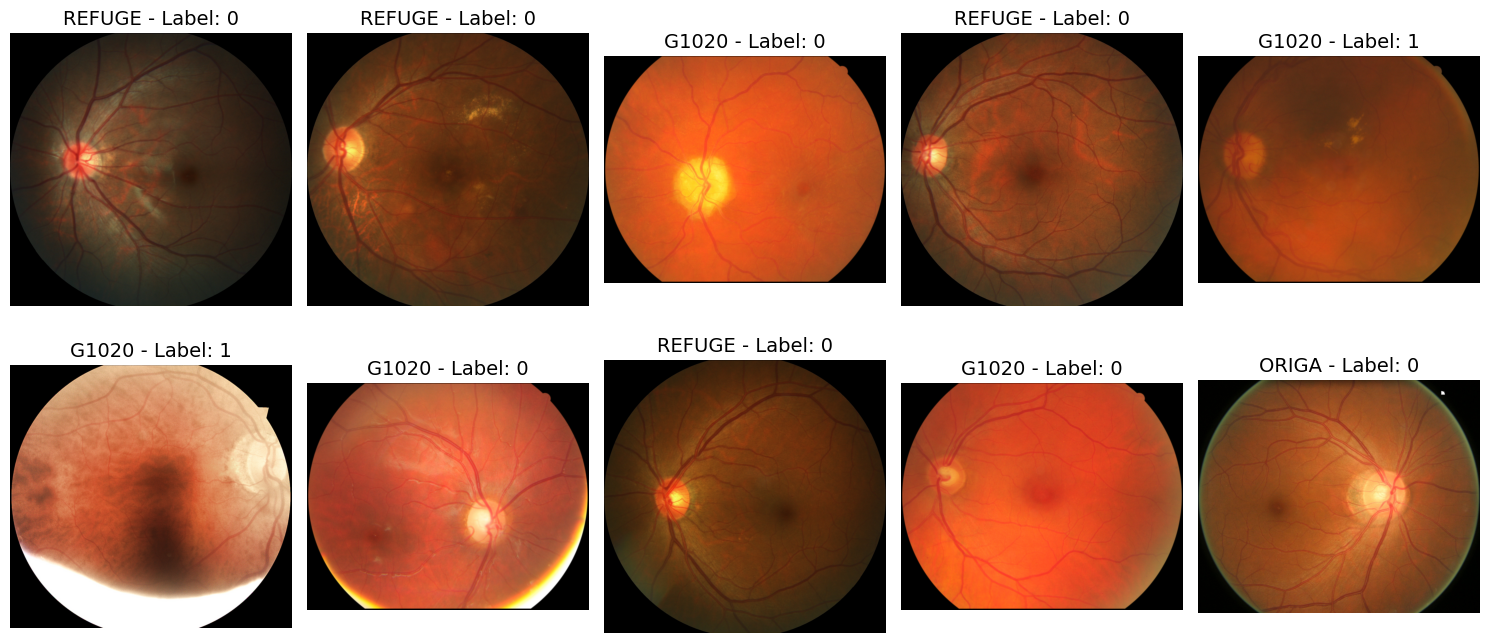

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Seleccionar 10 filas aleatorias
sample_df = df_total.sample(10).reset_index(drop=True)

# Crear la figura
plt.figure(figsize=(15, 7))

# Recorrer cada fila y mostrar la imagen con su etiqueta
for i in range(10):
    img_path = sample_df.loc[i, 'image_path']
    label = sample_df.loc[i, 'label']
    source = sample_df.loc[i, 'source']




    # Cargar imagen
    img = mpimg.imread(img_path)

    # Mostrar imagen
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{source} - Label: {label}", fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()


# **2. Preprocesamiento de imágenes**
# **3. División del Dataset en train, val and test**

Checklist para este paso:

| Proceso            | Descripción                                                          |
| ------------------ | -------------------------------------------------------------------- |
| Verificar imágenes | Validar que el archivo existe (`os.path.exists`)                     |
| Redimensionar      | Todas las imágenes a `224x224`                                       |
| Normalizar         | Escalar los valores de píxeles \[0, 1]                               |
| Data Augmentation  | Aplicar transformaciones (flip, rotación...) para evitar overfitting |
| Dividir en sets    | Separar en train (68%), val (17%) y test (15%)                       |


## Verificar existencia de imágenes

In [28]:
import os
import pandas as pd

# Convertir la columna 'image_path' a string para manejar posibles tipos mixtos
df_total['image_path'] = df_total['image_path'].astype(str)

# Filtramos solo las que existen
df_total = df_total[df_total['image_path'].apply(os.path.exists)]
print("Total imágenes válidas:", len(df_total))


Total imágenes válidas: 2070


📊 Distribución de clases:
Clase 0 (No Glaucoma): 1566 imágenes
Clase 1 (Glaucoma): 504 imágenes


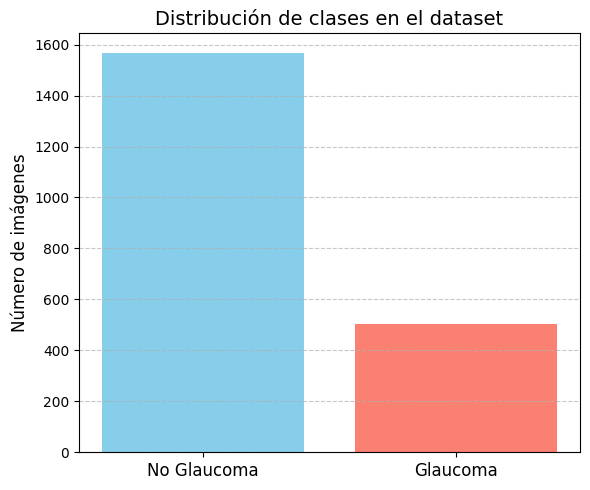

In [29]:
import matplotlib.pyplot as plt

# Contar las clases
class_counts = df_total['label'].value_counts().sort_index()

# Mostrar conteo por clase
print("📊 Distribución de clases:")
for label, count in class_counts.items():
    clase = "No Glaucoma" if label == 0 else "Glaucoma"
    print(f"Clase {label} ({clase}): {count} imágenes")

# Graficar la distribución
plt.figure(figsize=(6, 5))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['No Glaucoma', 'Glaucoma'], fontsize=12)
plt.ylabel("Número de imágenes", fontsize=12)
plt.title("Distribución de clases en el dataset", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Recorte de las imágenes alrededor del nervio óptico (objetivo)

🔹 Paso 1 a 3: Cargamos cada imagen y la convertimos a escala de grises para que sea más fácil de procesar.

🔹 Paso 4: Creamos una máscara circular:

        Solo analizaremos los píxeles DENTRO de un círculo grande en el centro → así evitamos puntos falsos en los bordes.

🔹 Paso 5-6: Aplicamos la máscara y buscamos el punto más brillante dentro del círculo.

🔹 Paso 7-8: Calculamos un recorte 350x350 alrededor de ese punto → nos aseguramos que no se salga de la imagen.

🔹 Paso 9-11: Hacemos el recorte y guardamos en la carpeta correcta (normal o glaucoma).

In [34]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [63]:
import cv2
import os
import pandas as pd
import numpy as np

# ------------------------
# 🚀 PARÁMETROS
# ------------------------

# Ruta de salida
output_dir = "./Recorte/"
os.makedirs(output_dir + "normal", exist_ok=True)
os.makedirs(output_dir + "glaucoma", exist_ok=True)

# Tamaño del recorte
crop_size = 350

# ------------------------
# 🚀 PROCESAR IMÁGENES
# ------------------------

# Recorremos el df_total
for idx, row in df_total.iterrows():

    # 1️⃣ Leer datos de la fila
    img_path = row['image_path']
    label = row['label']

    # 2️⃣ Cargar imagen
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error al cargar {img_path}")
        continue

    # 3️⃣ Convertir a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 4️⃣ Crear MÁSCARA CIRCULAR para evitar los bordes

    # Obtener tamaño de la imagen
    h, w = gray.shape

    # Definir centro de la imagen
    center_img = (w // 2, h // 2)

    # Definir radio del círculo (por ejemplo 80% del radio máximo)
    radius = int(0.55 * min(h, w))  # 0.4 para que el círculo quede bien dentro

    # Crear máscara circular (blanco en el círculo, negro afuera)
    mask = np.zeros((h, w), dtype=np.uint8)
    cv2.circle(mask, center_img, radius, (255), -1)  # -1 para llenar el círculo

    # 5️⃣ Aplicar la máscara a la imagen gris (solo analizamos dentro del círculo)
    masked_gray = cv2.bitwise_and(gray, gray, mask=mask)

    # 6️⃣ Encontrar el punto más brillante DENTRO de la máscara
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(masked_gray)
    center_x, center_y = maxLoc

    # 7️⃣ Calcular coordenadas del recorte 350x350 alrededor del punto encontrado
    half_crop = crop_size // 2
    start_x = max(center_x - half_crop, 0)
    start_y = max(center_y - half_crop, 0)
    end_x = start_x + crop_size
    end_y = start_y + crop_size

    # 8️⃣ Ajustar si se sale de los bordes
    if end_x > w:
        end_x = w
        start_x = end_x - crop_size
    if end_y > h:
        end_y = h
        start_y = end_y - crop_size

    # 9️⃣ Realizar el recorte
    cropped_img = img[start_y:end_y, start_x:end_x]

    # 10️⃣ Construir la ruta de guardado
    label_folder = "normal" if label == 0 else "glaucoma"
    filename = os.path.basename(img_path)
    save_path = os.path.join(output_dir, label_folder, filename)

    # 11️⃣ Guardar imagen recortada
    cv2.imwrite(save_path, cropped_img)

# ------------------------
print("✅ Proceso de recorte terminado con MÁSCARA CIRCULAR pro. 🚀")


✅ Proceso de recorte terminado con MÁSCARA CIRCULAR pro. 🚀


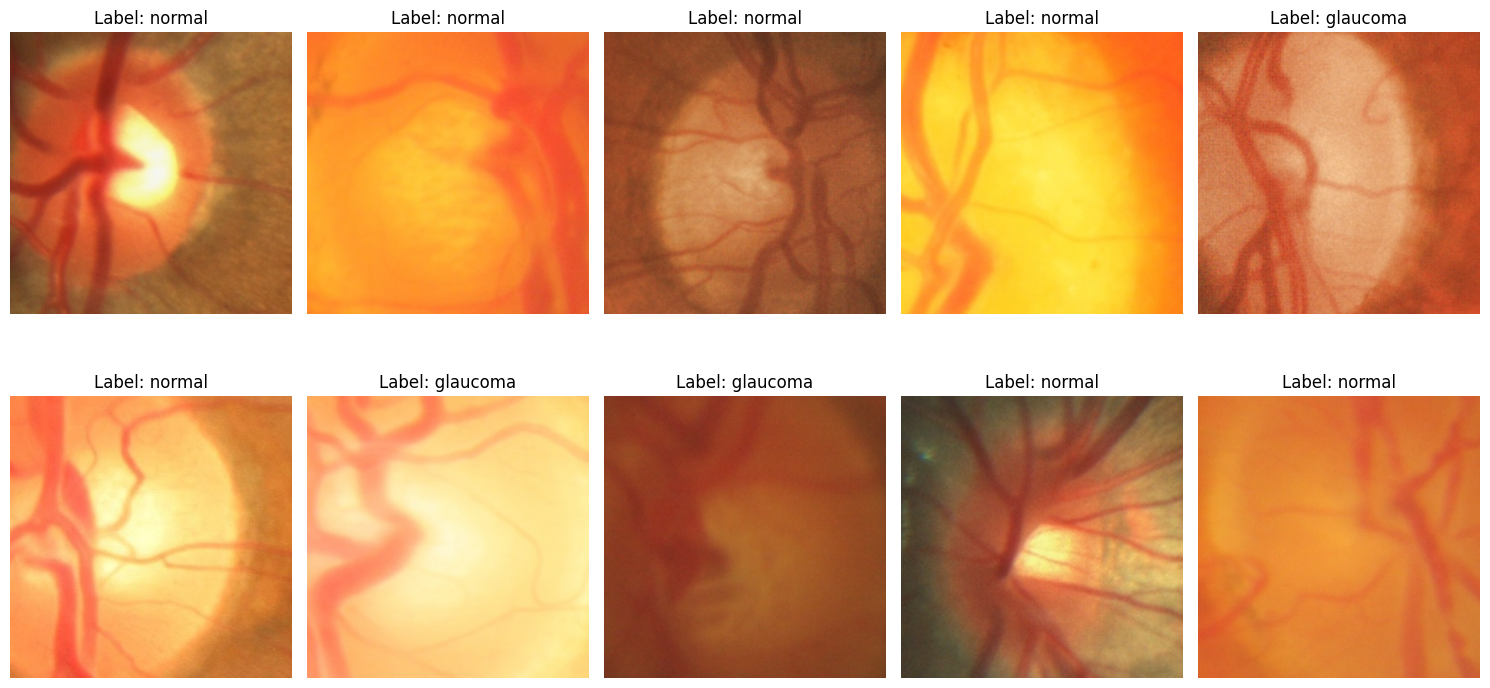

In [64]:
import matplotlib.pyplot as plt
import random
import cv2

# 🚀 Ruta de Recorte
recorte_dir = "./Recorte/"

# 🚀 Clases
class_folders = ['normal', 'glaucoma']

# 🚀 Construir lista completa de imágenes
all_images = []

for label_folder in class_folders:
    folder_path = os.path.join(recorte_dir, label_folder)
    images_in_folder = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Añadir con su etiqueta (label_folder)
    for img_path in images_in_folder:
        all_images.append( (img_path, label_folder) )

# 🚀 Elegir 10 imágenes aleatorias
sample_images = random.sample(all_images, 10)

# 🚀 Mostrar las imágenes
plt.figure(figsize=(15, 8))

for i, (img_path, label) in enumerate(sample_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Importar librerías necesarias para el preprocesamiento

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#### Definir `ImageDataGenerator` 

In [67]:
from tensorflow.keras.applications.resnet50 import preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    validation_split=0.32
)

test_val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.32
)


#### Crear generadores desde flow_from_directory

In [68]:
batch_size = 32
img_size = (350, 350)  # porque nuestras imágenes recortadas son 350x350

# 🚀 Generador de entrenamiento (68%)
train_generator = train_datagen.flow_from_directory(
    './Recorte/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

# 🚀 Generador de validación (17%)
val_generator = test_val_datagen.flow_from_directory(
    './Recorte/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True,
    seed=42
)

# 🚀 Mostrar clases
print("Clases:", train_generator.class_indices)


Found 1408 images belonging to 2 classes.
Found 662 images belonging to 2 classes.
Clases: {'glaucoma': 0, 'normal': 1}


# **4. Preparación del modelo ResNet50**

Estructura del modelo:

| Componente                                        | Rol                                                          |
| ------------------------------------------------- | ------------------------------------------------------------ |
| `ResNet50(weights='imagenet', include_top=False)` | Usamos la red preentrenada como extractor de características |
| `GlobalAveragePooling2D()`                        | Reduce dimensionalidad sin perder contexto espacial          |
| `Dropout(0.5)`                                    | Previene overfitting                                         |
| `Dense(128, activation='relu')`                   | Aprende patrones relevantes del fondo de ojo                 |
| `Dense(1, activation='sigmoid')`                  | Salida binaria: probabilidad de glaucoma                     |


In [69]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# 🚀 Cargar ResNet50 base
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(350, 350, 3)
)

# 🚀 Opcional: Freeze de las capas base
# 👉 Al inicio es bueno congelar las capas → luego podemos hacer fine-tuning
for layer in base_model.layers:
    layer.trainable = False

# 🚀 Construir el head personalizado
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# 🚀 Construir el modelo final
model = Model(inputs=base_model.input, outputs=output)

# 🚀 Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # learning rate conservador
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 🚀 Mostrar el resumen del modelo
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 350, 350,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 356, 356,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 175, 175,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 175, 175,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 175, 175,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 177, 177,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 88, 88,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 88, 88,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 88, 88,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 88, 88,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 88, 88,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 88, 88,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 88, 88,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 88, 88,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 88, 88,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 88, 88,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 88, 88,    │      1,024 │ conv2_block1_3_c

 Total params: 23,718,913 (90.48 MB)

 Trainable params: 131,201 (512.50 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

**¿Por qué se congelan las capas de un modelo preentrenado como ResNet50?**

Partimos de un modelo (ResNet50) entrenado previamente en millones de imágenes (ImageNet). Este modelo ya aprendió a detectar cosas como: bordes, texturas, formas circulares, contrastes, gradientes, e incluso patrones de retina.

La idea de congelar las capas es aprovechar ese conocimiento.

El momento de descongelar las capas es cuando el modelo ya entrenó la cabeza (top) y hay evidencia que no detecta bien los casos complejos, en este sentido sería la clase Glaucoma.


| Etapa                  | ¿Capas base?                    | ¿Objetivo?                                                   |
| ---------------------- | ------------------------------- | ------------------------------------------------------------ |
| Transfer learning base | Congeladas                      | Entrenar cabeza personalizada                                |
| Fine-tuning avanzado   | Descongeladas (parcial o total) | Aprender características específicas del problema (glaucoma) |


# **5. Entrenamiento del Modelo**

En este paso:

- Se entrena el modelo con los generadores `train_generator` y `val_generator`
- Su usará **early stopping** para evitar sobreentrenamiento
- Se guarda el mejor modelo durante el entrenamiento con **model checkpoint**
- Se registra la evolución de métricas


| Código            | Explicación                                                                 |
| ----------------- | --------------------------------------------------------------------------- |
| `EarlyStopping`   | Detiene el entrenamiento si `val_loss` no mejora (previene overfitting)     |
| `ModelCheckpoint` | Guarda automáticamente el mejor modelo (por `val_loss`) en un archivo `.h5` |
| `model.fit(...)`  | Inicia el entrenamiento por lotes usando los generadores configurados                    |
| `class_weight`  | Si las clases están desbalanceadas                    |

#### Calcular `class_weight`

In [70]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 🚀 Obtener labels reales del train_generator
y_train = train_generator.classes  # ya son 0 (normal) y 1 (glaucoma)

# 🚀 Calcular class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# 🚀 Convertir a diccionario
class_weights = dict(enumerate(class_weights))

# 🚀 Mostrar los pesos
print("📊 Class Weights:", class_weights)


📊 Class Weights: {0: np.float64(2.052478134110787), 1: np.float64(0.6610328638497652)}


### Definir callbacks (EarlyStopping y ModelCheckpoint)

In [71]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 🚀 EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# 🚀 ModelCheckpoint — guardamos el mejor modelo
checkpoint = ModelCheckpoint(
    './resnet50_glaucoma_recorte350_best.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


## Entrenar el modelo

In [72]:
# 🚀 Número de epochs
epochs = 30

# 🚀 Entrenamiento PRO con class_weight
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint],
    class_weight=class_weights,
    verbose=1
)


c:\Users\linaz\Desktop\MAESTRIA IA\Proyecto 1\MIAA-ICESI-ProyectoIA\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5080 - loss: 0.9980
Epoch 1: val_loss improved from inf to 0.61972, saving model to ./resnet50_glaucoma_recorte350_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 459s 10s/step - accuracy: 0.5090 - loss: 0.9970 - val_accuracy: 0.6979 - val_loss: 0.6197
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5122 - loss: 0.8709
Epoch 2: val_loss improved from 0.61972 to 0.61080, saving model to ./resnet50_glaucoma_recorte350_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 466s 11s/step - accuracy: 0.5126 - loss: 0.8709 - val_accuracy: 0.7221 - val_loss: 0.6108
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5585 - loss: 0.8184
Epoch 3: val_loss did not improve from 0.61080
44/44 ━━━━━━━━━━━━━━━━━━━━ 465s 11s/step - accuracy: 0.5586 - loss: 0.8179 - val_accuracy: 0.6949 - val_loss: 0.6376
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5647 - loss: 0.7932
Epoch 4: val_loss did not improve from 0.61080
44/44 ━━━━━━━━━━━━━━━━━━━━ 464s 11s/step - accuracy: 0.5643 - loss: 0.7925 - val_accuracy: 0.7205 - val_loss: 0.6372
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5534 - loss: 0.7564
Epoch 5: val_loss did not improve from 0.61080
44/44 ━━━━━━━━━━━━━━━━━━━━ 466s 11s/step - accuracy: 0.5529 - loss: 0.7565 - val_accuracy: 0.7326 - val_loss: 0.6445
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5360 - loss: 0.7638
Epoch 6: val_loss did not improve from 0.61080
44/44 ━━━━━━

El mejor modelo se guardó en la siguiente ruta: ./resnet50_recorte_best.h5

### GRAFICAR LOSS y ACCURACY

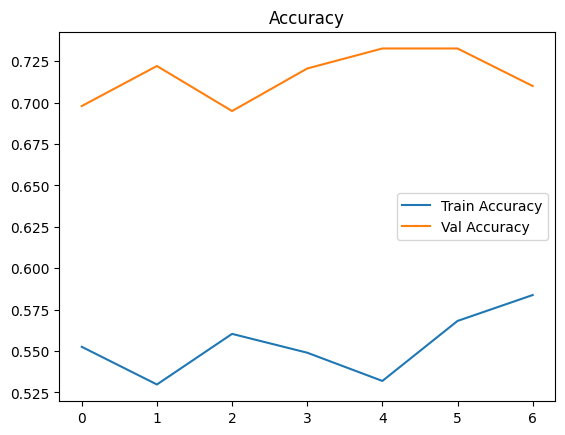

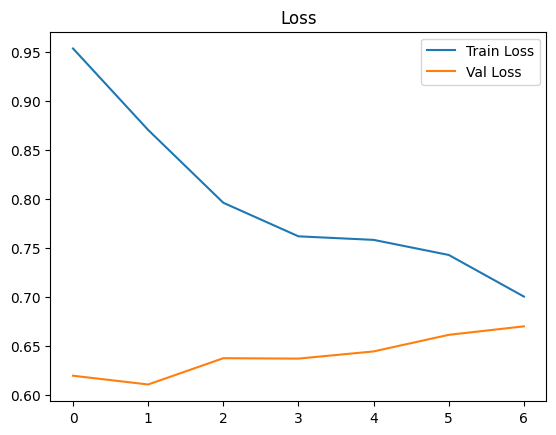

In [73]:
import matplotlib.pyplot as plt

# 🚀 Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# 🚀 Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


# **6. Evaluación del Modelo**

In [74]:
from tensorflow.keras.models import load_model

# Cargamos el mejor modelo guardado durante el entrenamiento
best_model = load_model('resnet50_recorte_best.h5')

### Obtener Predicciones

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import numpy as np

# 🚀 Resetear el generator para evaluar
val_generator.reset()

# 🚀 Obtener probabilidades
y_prob = model.predict(val_generator, verbose=1)

# 🚀 Convertir a clases (umbral 0.5)
y_pred = (y_prob > 0.5).astype(int)

# 🚀 Etiquetas verdaderas
y_true = val_generator.classes


21/21 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step


### Matriz de Confusión

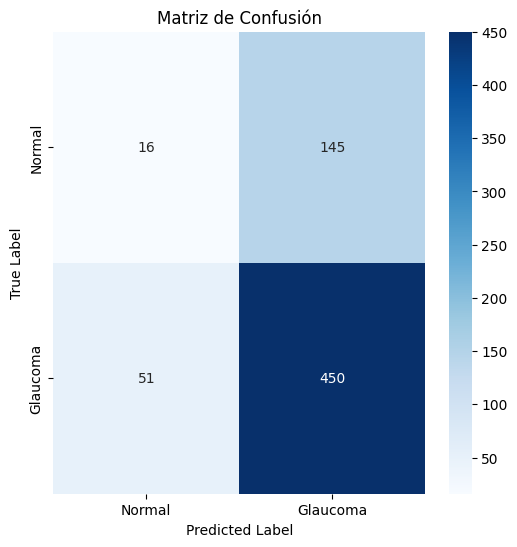

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 🚀 Calcular matriz
cm = confusion_matrix(y_true, y_pred)

# 🚀 Etiquetas de clase
class_names = ['Normal', 'Glaucoma']

# 🚀 Graficar
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Classification report

In [77]:
# 🚀 Reporte de clasificación
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.24      0.10      0.14       161
    Glaucoma       0.76      0.90      0.82       501

    accuracy                           0.70       662
   macro avg       0.50      0.50      0.48       662
weighted avg       0.63      0.70      0.66       662



Glaucoma: el modelo ya detecta muy bien con Recall 0.90 es excelente para un modelo en esta fase.

Normal: todavía le cuesta, Recall bajo (0.10)
es esperable porque los Normales son más heterogéneos visualmente.

### ROC curve + AUC

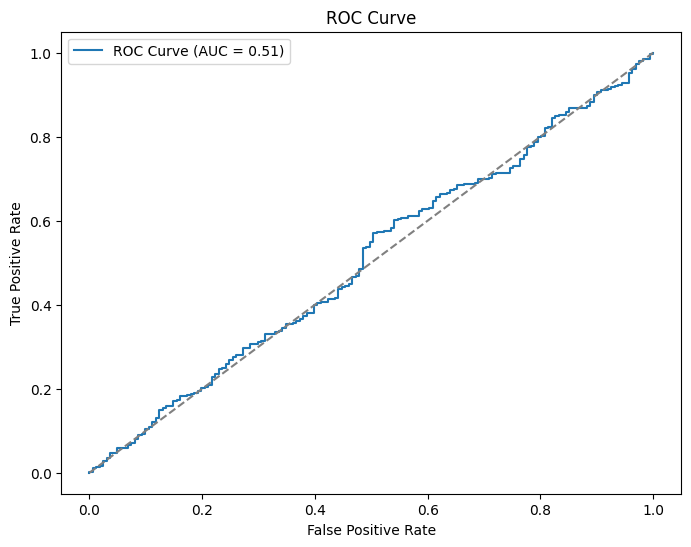

AUC Score: 0.5071224011604121


In [78]:
# 🚀 Calcular ROC y AUC
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
auc_score = roc_auc_score(y_true, y_prob)

# 🚀 Graficar ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 🚀 Mostrar AUC score
print("AUC Score:", auc_score)


## **FINE-TUNING**

Por qué hacer FINE-TUNING:

- El head ya aprendió a usar las features congeladas.
- Ahora queremos que las capas de ResNet50 se adapten mejor al dominio de imágenes de retina.

Eso mejora:

Precisión en Normal

Generalización en ambas clases

Estabilidad de val_loss

### Descongelar las últimas capas de ResNet50

In [79]:
# 🚀 Cuántas capas vamos a descongelar
# → Puedes probar con -30, -40, -50... depende de la fase
# → Aquí vamos a probar con las últimas 30 capas (muy común en papers)

for layer in base_model.layers[-30:]:
    layer.trainable = True

# 🚀 Mostrar cuáles capas quedaron entrenables
print("Capas entrenables después del fine-tuning:")
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, "Trainable =", layer.trainable)


Capas entrenables después del fine-tuning:
0 input_layer_2 Trainable = False
1 conv1_pad Trainable = False
2 conv1_conv Trainable = False
3 conv1_bn Trainable = False
4 conv1_relu Trainable = False
5 pool1_pad Trainable = False
6 pool1_pool Trainable = False
7 conv2_block1_1_conv Trainable = False
8 conv2_block1_1_bn Trainable = False
9 conv2_block1_1_relu Trainable = False
10 conv2_block1_2_conv Trainable = False
11 conv2_block1_2_bn Trainable = False
12 conv2_block1_2_relu Trainable = False
13 conv2_block1_0_conv Trainable = False
14 conv2_block1_3_conv Trainable = False
15 conv2_block1_0_bn Trainable = False
16 conv2_block1_3_bn Trainable = False
17 conv2_block1_add Trainable = False
18 conv2_block1_out Trainable = False
19 conv2_block2_1_conv Trainable = False
20 conv2_block2_1_bn Trainable = False
21 conv2_block2_1_relu Trainable = False
22 conv2_block2_2_conv Trainable = False
23 conv2_block2_2_bn Trainable = False
24 conv2_block2_2_relu Trainable = False
25 conv2_block2_3_conv T

### Recompilar el modelo



In [80]:
from tensorflow.keras.optimizers import Adam

# 🚀 Recompilamos con LR bajo (típico: 1e-5)
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


### Definir de nuevo callbacks

In [81]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 🚀 EarlyStopping para fine-tuning
early_stop_ft = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# 🚀 Guardar el mejor modelo del fine-tuning
checkpoint_ft = ModelCheckpoint(
    './resnet50_glaucoma_recorte350_finetuned_best.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


### Entrenar FINE-TUNING

In [82]:
# 🚀 Número de epochs para fine-tuning
epochs_ft = 15

# 🚀 Entrenamiento FINE-TUNING
history_ft = model.fit(
    train_generator,
    epochs=epochs_ft,
    validation_data=val_generator,
    callbacks=[early_stop_ft, checkpoint_ft],
    class_weight=class_weights,  # seguimos usando class_weight
    verbose=1
)


Epoch 1/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5721 - loss: 0.7368
Epoch 1: val_loss improved from inf to 0.64226, saving model to ./resnet50_glaucoma_recorte350_finetuned_best.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 595s 13s/step - accuracy: 0.5724 - loss: 0.7367 - val_accuracy: 0.6752 - val_loss: 0.6423
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5918 - loss: 0.7215 
Epoch 2: val_loss did not improve from 0.64226
44/44 ━━━━━━━━━━━━━━━━━━━━ 593s 14s/step - accuracy: 0.5918 - loss: 0.7212 - val_accuracy: 0.5982 - val_loss: 0.6648
Epoch 3/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5996 - loss: 0.7099
Epoch 3: val_loss did not improve from 0.64226
44/44 ━━━━━━━━━━━━━━━━━━━━ 584s 13s/step - accuracy: 0.5990 - loss: 0.7098 - val_accuracy: 0.5725 - val_loss: 0.6759
Epoch 4/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5748 - loss: 0.7160
Epoch 4: val_loss did not improve from 0.64226
44/44 ━━━━━━━━━━━━━━━━━━━━ 582s 13s/step - accuracy: 0.5745 - loss: 0.7156 - val_accuracy: 0.5665 - val_loss: 0.6825
Epoch 5/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5427 - loss: 0.7022 
Epoch 5: val_loss did not improve from 0.64226
44/44 

### Gráficas del fine-tuning

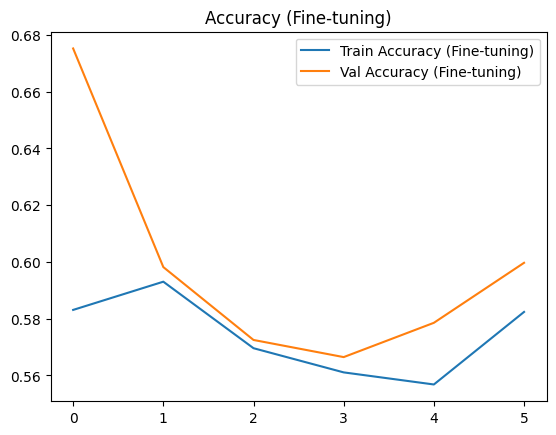

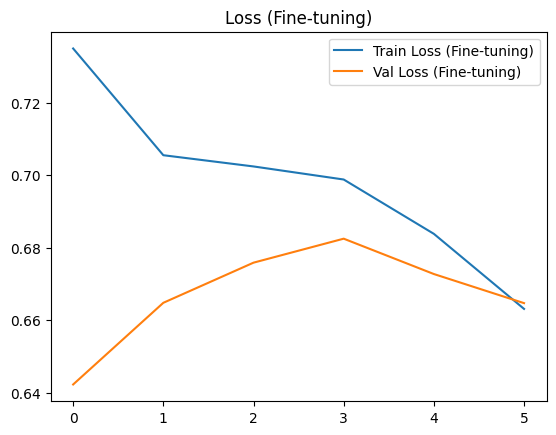

In [83]:
import matplotlib.pyplot as plt

# 🚀 Plot accuracy (fine-tuning)
plt.plot(history_ft.history['accuracy'], label='Train Accuracy (Fine-tuning)')
plt.plot(history_ft.history['val_accuracy'], label='Val Accuracy (Fine-tuning)')
plt.legend()
plt.title('Accuracy (Fine-tuning)')
plt.show()

# 🚀 Plot loss (fine-tuning)
plt.plot(history_ft.history['loss'], label='Train Loss (Fine-tuning)')
plt.plot(history_ft.history['val_loss'], label='Val Loss (Fine-tuning)')
plt.legend()
plt.title('Loss (Fine-tuning)')
plt.show()


## Evaluar FINE-TUNED

### Obtener predicciones

In [84]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import numpy as np

# 🚀 Resetear el val_generator
val_generator.reset()

# 🚀 Obtener probabilidades con el modelo fine-tuned
y_prob_ft = model.predict(val_generator, verbose=1)

# 🚀 Convertir a clases (umbral 0.5)
y_pred_ft = (y_prob_ft > 0.5).astype(int)

# 🚀 Etiquetas verdaderas
y_true_ft = val_generator.classes


21/21 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step


### Matriz de confusión y Classification report

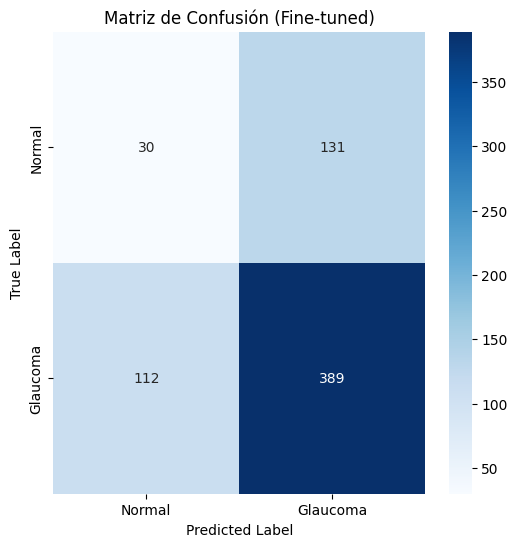

Classification Report (Fine-tuned):
              precision    recall  f1-score   support

      Normal       0.21      0.19      0.20       161
    Glaucoma       0.75      0.78      0.76       501

    accuracy                           0.63       662
   macro avg       0.48      0.48      0.48       662
weighted avg       0.62      0.63      0.62       662



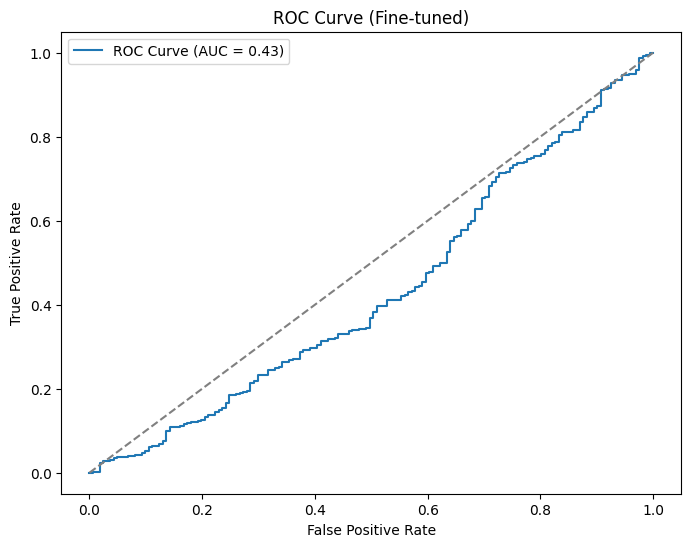

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 🚀 Calcular matriz
cm_ft = confusion_matrix(y_true_ft, y_pred_ft)

# 🚀 Etiquetas de clase
class_names = ['Normal', 'Glaucoma']

# 🚀 Graficar
plt.figure(figsize=(6,6))
sns.heatmap(cm_ft, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión (Fine-tuned)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 🚀 Reporte de clasificación
print("Classification Report (Fine-tuned):")
print(classification_report(y_true_ft, y_pred_ft, target_names=class_names))
# 🚀 Calcular ROC y AUC para el modelo fine-tuned
fpr_ft, tpr_ft, thresholds_ft = roc_curve(y_true_ft, y_prob_ft)
auc_score_ft = roc_auc_score(y_true_ft, y_prob_ft)
# 🚀 Graficar ROC para el modelo fine-tuned
plt.figure(figsize=(8,6))
plt.plot(fpr_ft, tpr_ft, label='ROC Curve (AUC = {:.2f})'.format(auc_score_ft))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Fine-tuned)')
plt.legend()
plt.show()